# [SC57 - Working with big, multi-dimensional geoscientific datasets in Python: a tutorial introduction to xarray](http://meetingorganizer.copernicus.org/EGU2017/session/25651)  
  
  
Original notebook by [Stephan Hoyer](http://stephanhoyer.com), Rossbypalooza, 2016.  
Modified by Edward Byers, Matthew Gidden and [Fabien Maussion](http://fabienmaussion.info/) for EGU General Assembly 2017, Vienna, Austria
Modified by C. Gentemann for GHRSST Science Team Tutorial 2019, Rome, Italy
  
  Sunday, 31 May 2019, 9:00 - 2:00  Hotel Flora  
  
  
**Convenors**
* [Dr Chelle Gentemann](mailto:gentemann@esr.org)    - Earth and Space Research, USA
* [Dr Marisol Garcia-Reyes](mailto:marisolgr@faralloninstitute.org)  - Farallon Institute, USA 
-------------


# With

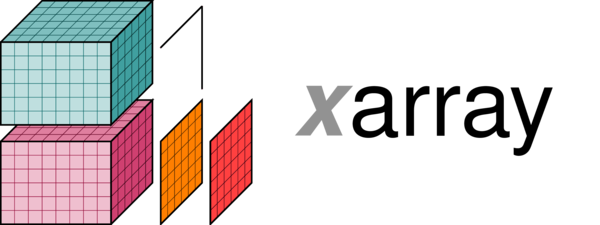

# you can reach


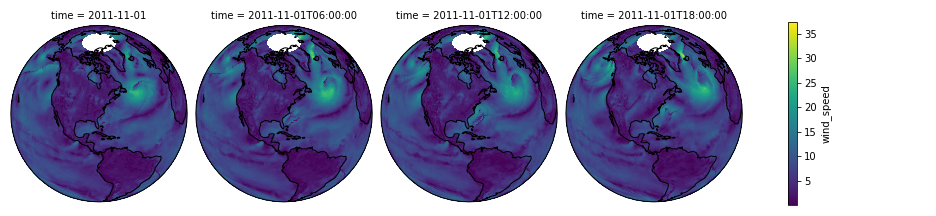

# Structure of this tutorial

1. Introduction to key features of `xarray`
2. Basic operations in xarray: opening, inspecting, selecting and indexing data
3. Selecting data with named dimensions
4. Operations and computation
6. Graphics
7. Collocating satellite data with a cruise dataset



# 1. Key features of `xarray`

## What is `xarray`?

*  `xarray` is an open source project and Python package
*  `xarray` has been designed to perform **labelled** data analysis on **multi-dimensional** arrays
* the xarray approach adopts the Common Data Model for **self-describing scientific data** in widespread use in the Earth sciences
*  `xarray.Dataset` is an in-memory representation of a netCDF file.
* `xarray` is built on top of the dataprocessing library [Pandas](http://pandas.pydata.org) (the best way to work with tabular data (e.g., CSV files) in Python)

# Our data

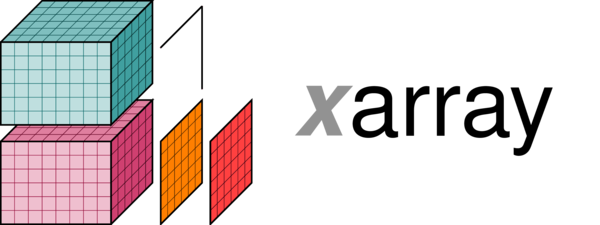

- numeric
- multi-dimensional
- labelled
- (lots of) metadata
- sometimes (very) large

## What is `xarray` good for?

* Gridded, multi-dimensional and large datasets, commonly used in earth sciences, but also increasingly finance, engineering (signal/image processing), and biological sciences
* Integration with other data analysis packages such as Pandas 
* I/O operations (NetCDF)
* Plotting
* Out of core computation and parallel processing
* ...

# 2. Basic operations in `xarray`

-------------------

## Import python packages

You are going to want numpy, pandas, matplotlib.pyplot and xarray

In [ ]:
import warnings
warnings.simplefilter('ignore') # filter some warning messages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

***
##  `DataArrays` is the basic structure in `xarray`
Create a data array using [xr.DataArray](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.html#xarray.DataArray)

class xarray.DataArray(data, name=None, coords=None, dims=None, attrs=None, encoding=None, indexes=None, fastpath=False)

give coords as a dictionary-like container of coordinate arrays, so `{'coord1_name':coord1_data, 'coord2_name':,coord2_data}`

give dims as a tuple of dimension names `('coord1_name','coord2_name')`


In [ ]:
sst_data = [[20,24,21,18],[21,23,26,22],[19,23,25,21]]
lat_data, lon_data = [30,35,40], [-145, -140,-135,-130 ]
da = xr.DataArray(sst_data, name='SST', coords={'lat':lat_data,'lon':lon_data}, dims=('lat','lon'))


## `DataSets` are collection of `DataArrays` with similar dimensions/coordinates, packed together in a dictionary-like structure. 

Use [xr.Dataset](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.html#xarray.Dataset)

class xarray.Dataset(data_vars=None, coords=None, attrs=None, compat=None)

You can just give a dictionary-like container of DataArrays, just use `da` that we just created to create a `ds` a dataset with three DataArrays.


In [ ]:
ds = xr.Dataset({'SST1':da,'SST2':da+0.5,'SST3':da-0.5})


## Properties of `xarray.Dataset` and `xarray.DataArray` objects

We'll start with the CMC SST dataset. Other tutorial examples [here](https://github.com/pydata/xarray/tree/master/examples).

## 2. Examining your data

* With well designed datasets that follow Climate Forecast (CF) conventions, you will usually get coordinates of lat,lon,time which makes it easy to select data and visualize it in different ways.  

* Notice that the time is automatically converted into a np.datetime64 format which can be queried for month, day, etc.  All the variables that are CF compliant are automatically converted (if needed) and read in so that you can immediately start working with the data.  

* Above, you can see that the dimensions are lat, lon, and time

* The coordinates of the datasets are also lat,lon, and time


use [xr.open_dataset](http://xarray.pydata.org/en/stable/generated/xarray.open_dataset.html) to open the provided url and print the dataset

* url is a text string to an online dataset.  When you open a file, you can just use the file name and path or you can just use the url for files that are available online.  If you are running this on the cloud you could even call cloud located data

* Here, we are reading in a global SST dataset called CMC from NASA's PO.DAAC
   

In [ ]:
#url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
url = 'https://podaac-opendap.jpl.nasa.gov/opendap/allData/ghrsst/data/GDS2/L4/GLOB/CMC/CMC0.2deg/v2/2011/305/20111101120000-CMC-L4_GHRSST-SSTfnd-CMC0.2deg-GLOB-v02.0-fv02.0.nc'
#url = './data/HadISST_sst.nc'
ds_sst = xr.open_dataset(url)
ds_sst

## Metadata --- Examining your data


* The data variable (analysed_sst) has the labeled dimensions and metadata attached.  You can see additional metadata (if it exists) by looking at the data variable of interest.  

* Below, type 
```ds_sst.ana``` then hit tab to autocomplete.  
* Then run the cell by holding shift and pressing enter.



In [ ]:
ds_sst.analysed_sst

* There are other older datasets that sometimes you have to remap to get into an easy to use format.  

* Another difficulty comes when some datasets are -180 to 180 longitudes and others are 0 to 360 in longitudes.


## Some more details on extracting info from an xarray dataset, to get attributes use `.attrs`

In [ ]:
ds_sst.analysed_sst.attrs

## If you want to get at the values in a data variable use `.values`

In [ ]:
ds_sst.analysed_sst.values

## Now, let's look to see what type of array this produces using `type()`

In [ ]:
type(ds_sst.analysed_sst.values)

## Now lets look at the dimensions using `.dims`

In [ ]:
ds_sst.analysed_sst.dims

## Now lets look at the size of one dimension using `.size`

In [ ]:
ds_sst.lat.size

## Let's open another file
Below, let's open CCMP winds for the same day using xarray.
To open a file use[xr.open_dataset](http://xarray.pydata.org/en/stable/generated/xarray.open_dataset.html)

The url filename we want to use is already included for you.

Then just print out the file details by just typing the dataset name, ds_ccmp

In [ ]:
url = 'https://podaac-opendap.jpl.nasa.gov/opendap/allData/ccmp/L3.0/flk/2011/11/analysis_20111101_v11l30flk.nc.gz'
ds_ccmp = xr.open_dataset(url)
ds_ccmp

## If you look at the time values you can see that the dataset is at :00, :06, :12, :18

* If you look at the lon values you can see that this dataset is 0-360 rather than -180-180, 

*  let's change the longitude coordinates using [.coords](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.coords.html) and then [.sortby](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.sortby.html) |

## To get from 0-360 to -180-180
```
ds_ccmp.coords['lon'] = np.mod(ds_ccmp.coords['lon'] + 180,360) - 180  
ds_ccmp = ds_ccmp.sortby(ds_ccmp.lon)
```

## To get from -180-180 to 0-360
```
ds_ccmp.coords['lon'] = np.mod(ds_ccmp['lon'], 360)
ds_ccmp = ds_ccmp.sortby(ds_ccmp.lon)
```

## Okay, try going from 0-360 to -180-180 below and then print out the dataset

In [ ]:
ds_ccmp.coords['lon'] = np.mod(ds_ccmp.coords['lon'] + 180,360) - 180
ds_ccmp = ds_ccmp.sortby(ds_ccmp.lon)
ds_ccmp

## Now look at your dataset, both are -180 to 180!


## Let's Do Some Math 

First we need to calculate the wind speed using numpy's sqrt function
```np.sqrt(ds_ccmp.uwnd**2 + ds_ccmp.vwnd**2)```

To assign a new `DataArray` use ```ds_ccmp['wind_speed'] = ```


In [ ]:
ds_ccmp['wind_speed'] = np.sqrt(ds_ccmp.uwnd**2 + ds_ccmp.vwnd**2)
ds_ccmp['wind_dir'] = np.arctan2(ds_ccmp.vwnd,ds_ccmp.uwnd)*360/np.pi


## Calculate the daily mean wind speed

Calculate the mean over time using [DataArray.mean()](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.mean.html).  This will take the mean of all the `DataArray` in this `DataSet`.  It has lots of useful options, like `keep_attrs = True` which saves all the attributes for future reference and `skipna = True` which can be useful when calculating climatologies where you only want to keep data when a full record is present.  Let's call the new mean `day_ave = `

Then we want to plot `day_ave.wind_speed` using [xr.DataArray.plot()](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.plot.html#xarray.DataArray.plot)

`xarray` uses the coordinate name along with metadata `attrs.long_name`, `attrs.standard_name`, `DataArray.name` and `attrs.units` (if available) to label the axes. 

In [ ]:
ds_ccmp['wind_speed'] = np.sqrt(ds_ccmp.uwnd**2 + ds_ccmp.vwnd**2)
day_ave = ds_ccmp.mean(dim='time',keep_attrs=True)
day_ave

In [ ]:
day_ave.attrs['description']='Daily average'
day_ave

In [ ]:
day_ave.wind_speed.plot();

# 3. Selecting data with named dimensions

In `xarray` there are many different ways for selecting and indexing data.

### Positional indexing (old way)

This is the "old way", i.e. like ``numpy``:  `[0, :, 900]`

In [ ]:
ds_sst.analysed_sst[0, :, 900]  # note that the attributes, coordinates are preserved

Now plot out the selected data using `.plot()`

In [ ]:
ds_sst.analysed_sst[0, :, 900].plot();

## There are different ways to select or mask data in xarray.  You can use .isel or .sel to select by coordinates, but if you want to select by a data variable you need to use .where



### Selection by index

Selection based on the **index** of a coordinate:

Selection by index implies prior knowledge about the structure of the data, and is therefore much less readable than the "xarray methods" presented below.  What is `time=0`?  You have to query time to find out. 

In [ ]:
ds_sst.analysed_sst.isel(time=0).plot();  # like above, but with a dimension name this time

### Selection by value

Selection based on the **value** of a coordinate:

In [ ]:
ds_sst.analysed_sst.sel(lon=0).plot(); 

### Selection by value works well for time, too

In [ ]:
ds_sst.analysed_sst.sel(time='2011-11-01').plot();  # or look at a single timestep

### Selecting a range of values

Let's try to select a region off the California coast, lat 20 to 50 and lon -140 to -110

The syntax is similar, but you'll need to use a [slice](https://docs.python.org/3/library/functions.html#slice):

Use `day_ave` for your selection.

Save your selection to `subset = ` and then `.plot()` the wind_speed

In [ ]:
subset = day_ave.sel(lat=slice(20,50),lon=slice(-140,-110))
subset.wind_speed.plot()

### Nearest neighbor lookup

from `ds_sst` select the `analysed_sst` closest to `lat=10` and then plot the data

use `method='nearest'` and `tolerance=5`

In [ ]:
ds_sst.analysed_sst.sel(lat=10, method='nearest', tolerance=5).plot();

## Another way to select or mask your data, but based on data variables is to use [.where](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.where.html):   

Below, from `day_ave` create a masked array `ds_ccmp_masked` using `.where(day_ave.nobs>0)` and then plot the wind speed

In [ ]:
ds_ccmp_masked = day_ave.where(day_ave.nobs>0)
ds_ccmp_masked.wind_speed.plot()

## 4.  Interpolation

## What if we want to look at two datasets together?

CMC SSTs are on a 0.2 deg grid, while CCMP winds are on a 0.25 deg grid

xarray provides [.interp](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.interp.html) and [.interp_like](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.interp_like.html) for interpolation of data

Let's start by interpolating the CCMP winds `ds_ccmp` so that they are 'like' the CMC SSTs `ds_sst`.
Again, this demonstrates the power of xarray as it performs the interpolation for all data variables


In [ ]:
ds_ccmp_interp = ds_ccmp.interp_like(ds_sst)
ds_ccmp_interp

## Now that CCMP is on the same coordinate system as CMC SST data we can use .where to select different data

create a dataset `masked` where you select different `ds_sst` datasets based on `ds_ccmp` wind speeds


In [ ]:
masked = ds_sst.where(ds_ccmp_interp.wind_speed<2)
masked.analysed_sst.plot()


create `masked` dataset by masking land values using .where `.where(ds_sst.mask==1)`

plot the data to check you are doing it right.

what happens if you change the mask values?

what are the different mask values?


In [ ]:
masked = ds_ccmp_interp.where(ds_sst.mask==1)
masked.wind_speed.plot()

# xarray can do more!

* concatentaion
* open network located files with openDAP
* import and export Pandas DataFrames
* .nc dump to 
* groupby_bins
* resampling and reduction

For more details, read this blog post: http://continuum.io/blog/xray-dask


In [ ]:
#ds_collocated_nearest.to_netcdf('./data/new file.nc')

## Where can I find more info?

### For more information about xarray

- Read the [online documentation](http://xarray.pydata.org/)
- Ask questions on [StackOverflow](http://stackoverflow.com/questions/tagged/python-xarray)
- View the source code and file bug reports on [GitHub](http://github.com/pydata/xarray/)

### For more doing data analysis with Python:

- Thomas Wiecki, [A modern guide to getting started with Data Science and Python](http://twiecki.github.io/blog/2014/11/18/python-for-data-science/)
- Wes McKinney, [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) (book)

### Packages building on xarray for the geophysical sciences

For analyzing GCM output:

- [xgcm](https://github.com/xgcm/xgcm) by Ryan Abernathey
- [oogcm](https://github.com/lesommer/oocgcm) by Julien Le Sommer
- [MPAS xarray](https://github.com/pwolfram/mpas_xarray) by Phil Wolfram
- [marc_analysis](https://github.com/darothen/marc_analysis) by Daniel Rothenberg

Other tools:

- [windspharm](https://github.com/ajdawson/windspharm): wind spherical harmonics by Andrew Dawson
- [eofs](https://github.com/ajdawson/eofs): empirical orthogonal functions by Andrew Dawson
- [infinite-diff](https://github.com/spencerahill/infinite-diff) by Spencer Hill 
- [aospy](https://github.com/spencerahill/aospy) by Spencer Hill and Spencer Clark
- [regionmask](https://github.com/mathause/regionmask) by Mathias Hauser
- [salem](https://github.com/fmaussion/salem) by Fabien Maussion

Resources for teaching and learning xarray in geosciences:
- [Fabien's teaching repo](https://github.com/fmaussion/teaching): courses that combine teaching climatology and xarray
